In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import numpy as np
import pandas as pd
from bokeh.io import output_file, output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import GnBu3, OrRd3
from bokeh.plotting import figure
from scipy.stats import wilcoxon

from dnafiber import get_model
from dnafiber.data.intergrader import BLIND_MAPPING, REVERSE_BLIND_MAPPING
from dnafiber.data.intergrader.analysis import (
    extract_fiber_properties,
    extract_properties_from_datadict,
    skeletonize_data_dict,
)
from dnafiber.data.intergrader.io import read_mask_from_path_gens
from dnafiber.data.intergrader.plot import imshow_compare


In [2]:
model = get_model()

In [3]:
root_clement = "C:/Users/cleme/OneDrive/PostDoc/data/labelled/DNAFiber_Clement/export/colormaps/local/common"
root_yosra = "C:/Users/cleme/OneDrive/PostDoc/data/labelled/Yosra/export/colormaps/local/common"
root_hugo = "C:/Users/cleme/OneDrive/PostDoc/data/labelled/Hugo/export/colormaps/local/common"
root_santiago = "C:/Users/cleme/OneDrive/PostDoc/data/labelled/Santiago/export/colormaps/local/common"

yosra_files = list(Path(root_yosra).rglob("*/*.png"))
clement_files = list(Path(root_clement).rglob("*/*.png"))
hugo_files = list(Path(root_hugo).rglob("*/*.png"))
santiago_files = list(Path(root_santiago).rglob("*/*.png"))

yosra_files = sorted(yosra_files, key=lambda x: x.stem)[:-1]
clement_files = sorted(clement_files, key=lambda x: x.stem)[:-1]
hugo_files = sorted(hugo_files, key=lambda x: x.stem)[:-1]
santiago_files = sorted(santiago_files, key=lambda x: x.stem)[:-1]

dict_gens = {
    "S": santiago_files,
    "H": hugo_files,
    "Y": yosra_files,
    "C": clement_files,

}
output = read_mask_from_path_gens(dict_gens, REVERSE_BLIND_MAPPING)
skeletons = skeletonize_data_dict(output)


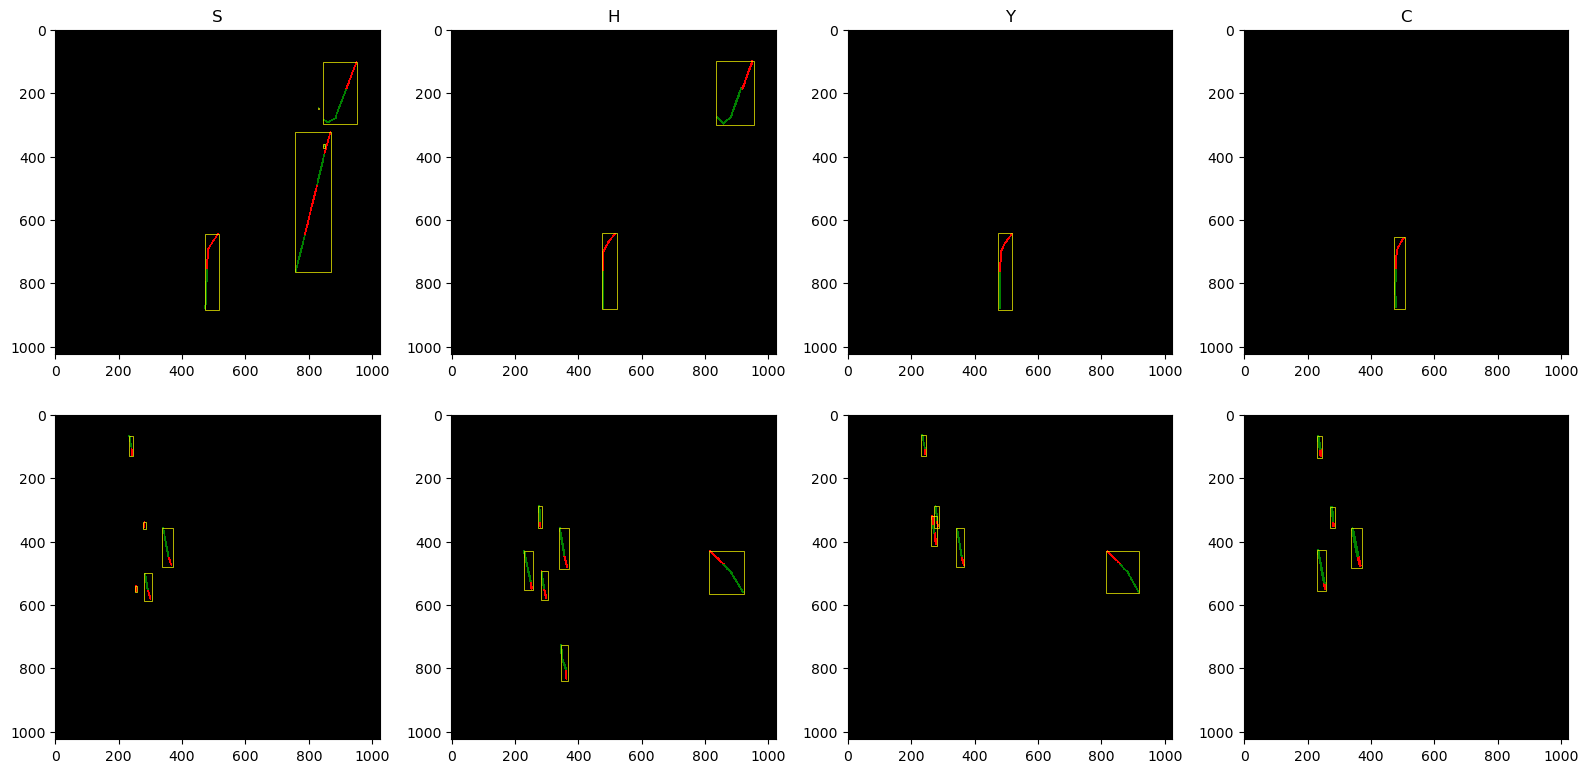

In [4]:
fig, axes = imshow_compare(output, draw_bbox=True, max_images=2, ax_size=4)

In [5]:
properties = extract_properties_from_datadict(skeletons)
df = pd.DataFrame.from_dict(properties)
df['common'] = df['S'].astype(int) + df['H'].astype(int) + df['Y'].astype(int) + df['C'].astype(int) 

df.to_pickle("properties.pkl")



In [ ]:
yosra_files

[WindowsPath('C:/Users/cleme/OneDrive/PostDoc/data/labelled/Yosra/export/colormaps/local/common/3/tile_11.png'),
 WindowsPath('C:/Users/cleme/OneDrive/PostDoc/data/labelled/Yosra/export/colormaps/local/common/16/tile_12.png'),
 WindowsPath('C:/Users/cleme/OneDrive/PostDoc/data/labelled/Yosra/export/colormaps/local/common/8/tile_13.png'),
 WindowsPath('C:/Users/cleme/OneDrive/PostDoc/data/labelled/Yosra/export/colormaps/local/common/13/tile_14.png'),
 WindowsPath('C:/Users/cleme/OneDrive/PostDoc/data/labelled/Yosra/export/colormaps/local/common/8/tile_15.png'),
 WindowsPath('C:/Users/cleme/OneDrive/PostDoc/data/labelled/Yosra/export/colormaps/local/common/9/tile_16.png'),
 WindowsPath('C:/Users/cleme/OneDrive/PostDoc/data/labelled/Yosra/export/colormaps/local/common/11/tile_17.png'),
 WindowsPath('C:/Users/cleme/OneDrive/PostDoc/data/labelled/Yosra/export/colormaps/local/common/9/tile_17.png'),
 WindowsPath('C:/Users/cleme/OneDrive/PostDoc/data/labelled/Yosra/export/colormaps/local/comm

: 